In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
dict_dtype = {'Item Number':str,
'Bottle Volume (ml)':int,
'Bottles Sold':int,
'State Bottle Retail':float}

In [5]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\item_info_to_cluster.csv',dtype=dict_dtype, index_col=0)

In [6]:
products.rename({'Item Number':'Item_Number', \
              'Item Description':'Item_Description','Bottle Volume (ml)':'Bottle_Volume','State Bottle Retail': 'Bottle_Retail' \
                ,'Bottles Sold':'Bottles_Sold' } ,axis=1, inplace=True)
              

In [7]:
products2 = products.copy()

In [8]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold
count,4475.000000,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03
std,410.724957,69.350753,3.972229e+04
min,20.000000,0.990000,1.000000e+00
25%,750.000000,11.799501,5.250000e+01
50%,750.000000,20.250000,5.470000e+02
75%,750.000000,35.000000,3.622000e+03
max,5250.000000,2963.694000,2.105088e+06


In [9]:
products.shape

(4475, 5)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

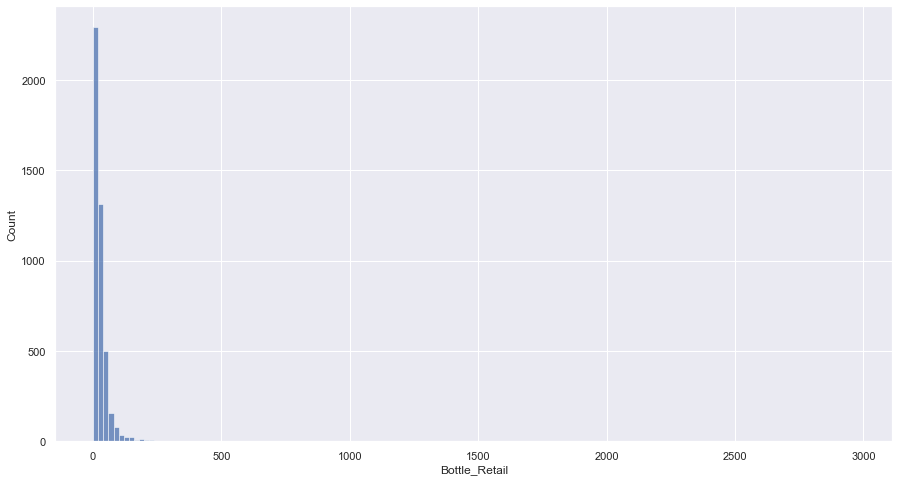

In [10]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


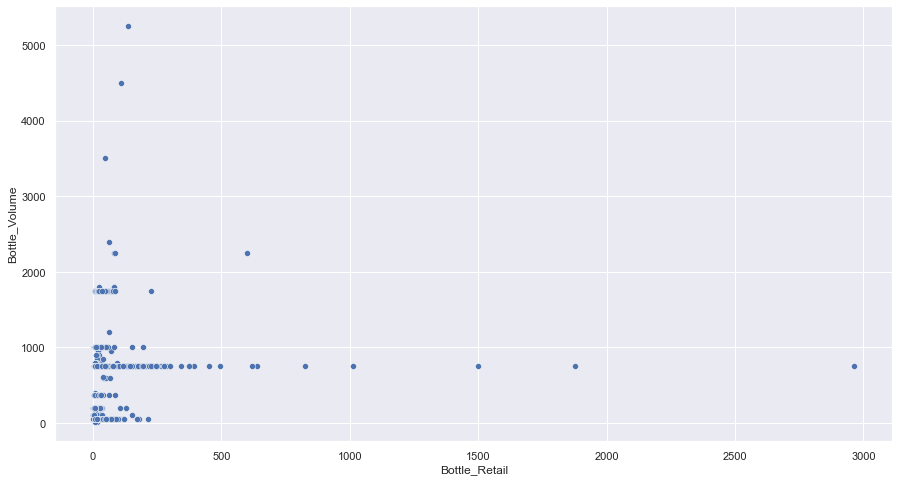

In [11]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [12]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [13]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [14]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [15]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
1636,48725,Remy Martin Louis XIII,750,2963.694,17
3330,917673,HA Double Eagle Very Rare,750,1500.000,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10


In [16]:
# filt2 = products.Bottle_Volume > 3000
# products[filt2]

In [17]:
np.sum(products.Bottles_Sold)

31013272

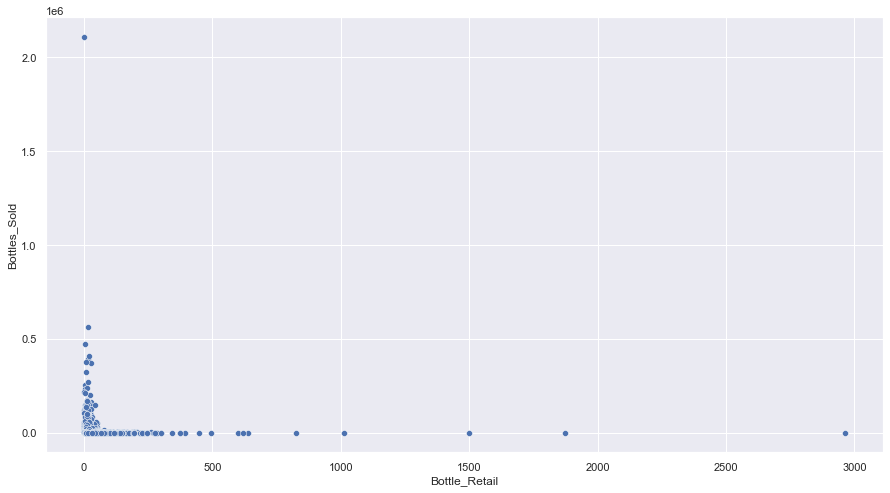

In [18]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

remove outliers

In [19]:
filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail

In [20]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
1636,48725,Remy Martin Louis XIII,750,2963.694,17
3330,917673,HA Double Eagle Very Rare,750,1500.000,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10


In [21]:

products2 = products2[~filt]

In [22]:
products2.shape

(4472, 5)

In [23]:
# filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [24]:
# products2 = products2[~filt2] 

In [25]:
products2.shape

(4472, 5)

scale data for clustering

In [26]:
products2.shape

(4472, 5)

In [27]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [28]:
scaler = StandardScaler()

In [29]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.472000e+03,4.472000e+03,4.472000e+03
mean,-9.748215e-16,3.927954e-17,3.910110e-19
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.880139e+00,-7.111268e-01,-1.745243e-01
25%,-1.031850e-01,-4.449795e-01,-1.731966e-01
50%,-1.031850e-01,-2.361435e-01,-1.607566e-01
75%,-1.031850e-01,1.276158e-01,-8.332920e-02
max,1.085064e+01,2.423438e+01,5.280928e+01


In [31]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = [ 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [33]:
from sklearn.metrics import silhouette_score

cluster_cols = [ 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]

inertia_scores = []
for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    
#     intertia = model.inertia_
#     inertia_scores.append(inertia)
    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.9831620175046185
number of clusters =  3   silhouette score =  0.8455926729898893
number of clusters =  4   silhouette score =  0.7013276829545837
number of clusters =  5   silhouette score =  0.7257914111302797
number of clusters =  6   silhouette score =  0.5685824850887509
number of clusters =  7   silhouette score =  0.6002369612172159
number of clusters =  8   silhouette score =  0.5338403953806723
number of clusters =  9   silhouette score =  0.5176451977489417
number of clusters =  10   silhouette score =  0.5410862966699624


In [34]:
from freq_pd import proc_freq

In [35]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

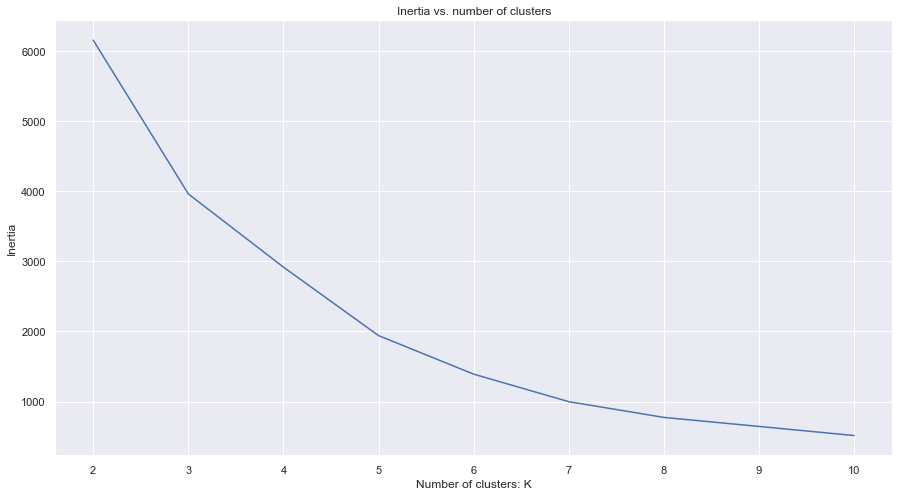

In [36]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [37]:


cluster_cols = [ 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=2, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [ ]:
products2.head()

In [ ]:
products2.info()

In [38]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

In [ ]:
products2.Bottle_Volume_liters.std()

In [39]:
products2.loc[products2.product_cluster==0,:]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster,Bottle_Volume_liters
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.00,1123,6.590820,0.374232,-0.146284,0,3.500
1,10006,Scoresby Rare Scotch,750,7.70,4619,-0.103185,-0.545647,-0.058292,0,0.750
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,-0.103185,-0.348847,-0.107121,0,0.750
3,10008,Scoresby Rare Scotch,1750,15.75,12340,2.330999,-0.347121,0.136041,0,1.750
4,10009,Scoresby Rare Scotch,1000,10.11,1722,0.505361,-0.486213,-0.131208,0,1.000
...,...,...,...,...,...,...,...,...,...,...
4470,999931,Amrut Bagheeera Single Malt Whisky,750,75.00,6,-0.103185,1.114082,-0.174398,0,0.750
4471,999932,Single Malts of India Neidhal,750,76.74,6,-0.103185,1.156993,-0.174398,0,0.750
4472,999991,Legs Diamond Bourbon,750,45.00,6,-0.103185,0.374232,-0.174398,0,0.750
4473,999992,Kings County Distillery Aged Gift Set,600,67.50,6,-0.468313,0.929119,-0.174398,0,0.600


In [40]:
products2.loc[products2.product_cluster==1,:]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster,Bottle_Volume_liters
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,-1.685404,-0.702249,52.809281,1,0.1
